Adapted by Carlos Toxtli https://www.carlostoxtli.com/#colab-mlp-2

Source: https://github.com/littlenine/MLP-tutorial/blob/master/MLP%20with%20MNIST.ipynb

# MLP

In this tutorial, we will use Keras and MNIST dataset.
  
  
MNIST dataset is a opensource dataset for hand writing.
Each image is in size 28 x 28 pixel.
  

Before we start get into Keras, let's prepare some visualize methods.

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image

def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):        
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)
    
def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)
    
def show_online_image(target_url):
    # Image(url= "https://gluon.mxnet.io/_images/dcgan.png")
    Image(url= target_url)
    
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title="label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([]);
        idx += 1
    plt.show()
    
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    print(train_history.history.keys())
    
    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])
    
    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])
        
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    
    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])
        
    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])
        
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

### Load and check your datas
You can load your dataset from Keras directly.
Let's check how it looks like.

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


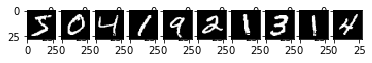

number of training images: 60000
number of test images: 10000


In [ ]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

Now we know the how many images we have in training data, and we know the structure of MLP.  
  
**How to make image into MLP input?**    
Simply, we make it into a vector.

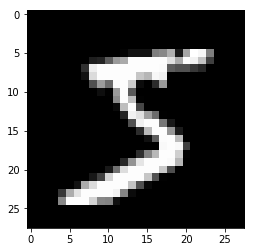

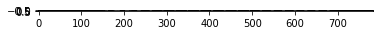

In [ ]:
sample = x_train[0]

# origin image
show_image(sample)

# input of MLP, a images were transfer into a vector
show_image(sample.reshape(1, 28 * 28))

In [ ]:
# update all the training, testing dataset.
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize them into range [0, 1]
x_train /= 255
x_test /= 255

**Why Normalize need to divide by 255 for image?**  

In computer vision, the color space were 
R \[0,255\]
G \[0,255\]
B \[0,255\]

While we use gray images, the color space of R G B were same.  
We can take color space \[3, High, Weight\] of an image as
\[1, High, Weight\].  
Same as \[H, W\]  

## Prepare your first model  
  
In Keras, you can create model layers like a Queue.  

In [ ]:
from tensorflow.keras import layers

num_classes = 10

# create a Sequential model
model = keras.Sequential(
    [
        # input layer. input data with size 28*28 and output size 256
        # 256 means you set up your modul with 256 NN in this layer. This value is up to you.
        layers.Dense(256, input_shape=(28*28,), activation='relu'), 
        
        # hidden layer. input data with size 256, which were same to output of input layer.
        # output size 256, we set up 256 NN again in this hidden layer.
        # no need to give input size here because keras already know.
        layers.Dense(256, activation='relu'),
        
        # output layer. the number of output should be your number of classification
        layers.Dense(num_classes, activation='softmax')
    ]
);

# print out model structure
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


**What we have in our model is:**  
input layer: input size = 28*28+1, output size = 256.  we have totally (28*28+1)* 256 = 200960 parameters.  
hidden layer: input size = 256 + 1, output size = 256. we have totally (256+1)* 256   = 65792 parameters.  
output layer:input size = 256 + 1, output size = 10.   we have totally (256+1)* 10    = 2570 parameters.  

## Compile your model
We can now move on to compile our model.  
Here are the parameters:  
- optimizer : how to optimize your weights.
- loss : loss function.
- metrics : how to evaluate your model.

we don't disscuss how to select your optimizer and loss here. :)  
Let's introduce 2 important setting in Machine Learning.
- Batch : there are 2 ways to update your weights in model  
    - update everytime after watching **an** input.
    - update once after watching **batch** of inputs.  
      
    here we update once for 1000 inputs.  
- Epochs : how many times you want to look overwhole your datas.

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

batch_size = 256
epochs = 10
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 121us/sample - loss: 0.2211 - acc: 0.9330 - val_loss: 0.1155 - val_acc: 0.9644
Epoch 2/10
48000/48000 [==============================] - 6s 116us/sample - loss: 0.0905 - acc: 0.9725 - val_loss: 0.0938 - val_acc: 0.9707
Epoch 3/10
48000/48000 [==============================] - 5s 113us/sample - loss: 0.0607 - acc: 0.9806 - val_loss: 0.0929 - val_acc: 0.9722
Epoch 4/10
48000/48000 [==============================] - 5s 112us/sample - loss: 0.0467 - acc: 0.9850 - val_loss: 0.0842 - val_acc: 0.9778
Epoch 5/10
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0371 - acc: 0.9876 - val_loss: 0.0962 - val_acc: 0.9732
Epoch 6/10
48000/48000 [==============================] - 5s 113us/sample - loss: 0.0286 - acc: 0.9907 - val_loss: 0.0980 - val_acc: 0.9761
Epoch 7/10
48000/48000 [==============================] - 6s 116us/sample - loss: 0.0260 - acc: 0.9911 - val_l

## Check result of model

How it works on testing data?  

In [ ]:
scores, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', acc)

Test loss: 0.09556611816181534
Test accuracy: 0.9773



  
It looks nice!   
  
Let's visualize our result by printing out 25 images of label and predict result.

Test prediction: [7 2 1 ... 4 5 6]


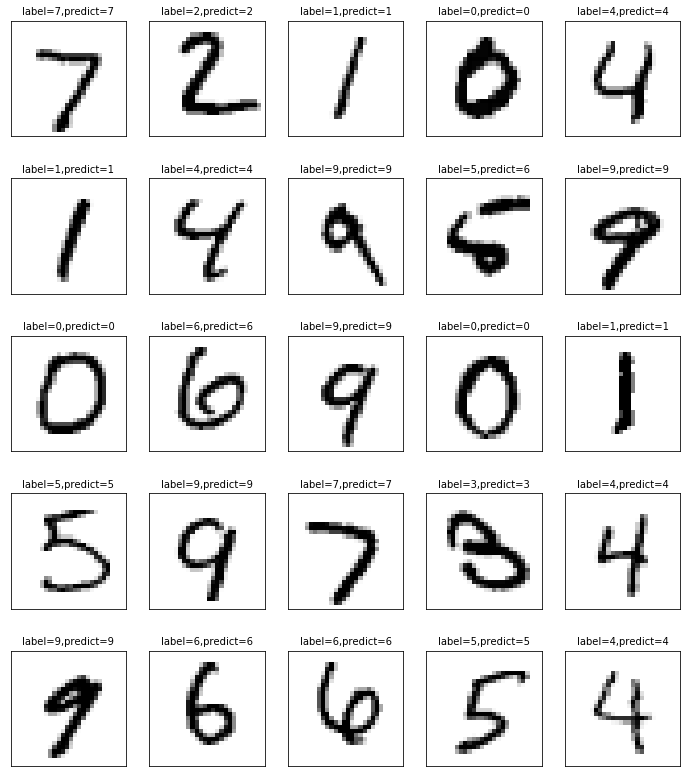

In [ ]:
prediction = model.predict_classes(x_test)
print('Test prediction:', prediction)

i = 0  # start from 0
j = 25 # end at 25

(_, _), (x_test_image, y_test_label) = mnist.load_data()
plot_images_labels_prediction(x_test_image,y_test_label,prediction,i,j)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


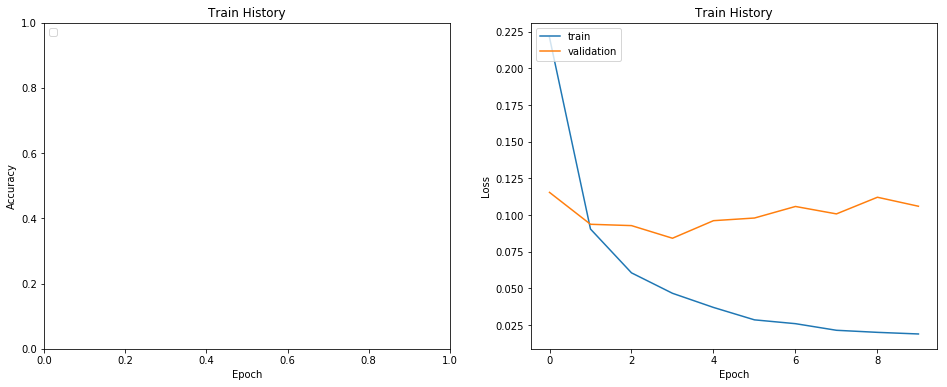

In [ ]:
#show train history
show_train_history(history)

In [ ]:
import pandas as pd

# create confusion matrix
pd.crosstab(y_test_label, prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,2,0,1,1,4,1,1,1
1,0,1118,3,3,0,2,2,0,6,1
2,0,0,1008,5,3,0,3,4,9,0
3,1,0,2,996,0,4,0,2,4,1
4,2,0,2,1,954,0,4,1,0,18
5,3,0,0,13,0,870,3,1,2,0
6,4,2,1,0,2,4,942,0,2,1
7,1,2,6,9,1,0,0,1001,4,4
8,4,0,2,13,1,5,0,2,945,2


In [ ]:
#import jovian
#jovian.commit()

ModuleNotFoundError: ignored